Habib ur Rehman Owasi

Fellowship.ai

# Unzip Image File

Unzip files to explore the data.

In [ ]:
import tarfile

# To extract a .tgz file
with tarfile.open('102flowers.tgz', 'r:gz') as tar:
    tar.extractall(path='C:\\Fellowshipai')
# Repeat the process for 102segmentations.tgz
with tarfile.open('102segmentations.tgz', 'r:gz') as tar:
    tar.extractall(path='C:\\Fellowshipai')

# Load .mat files

In [1]:
from scipy.io import loadmat

# Load a .mat file
image_labels = loadmat('imagelabels.mat')
data_splits = loadmat('setid.mat')

# Access data
labels = image_labels['labels']
train_ids = data_splits['trnid']
validation_ids = data_splits['valid']
test_ids = data_splits['tstid']


# Visualizing flower image

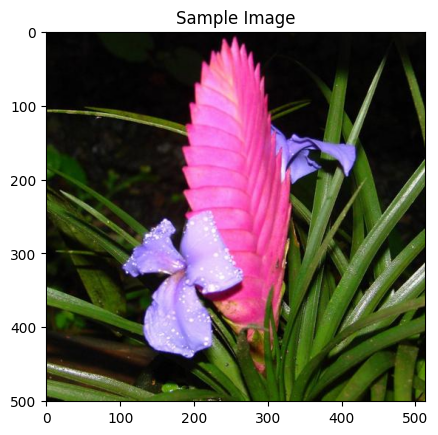

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load a sample image
sample_image_path = os.path.join('jpg', 'image_08114.jpg')
sample_image = Image.open(sample_image_path)

# Display the image
plt.imshow(sample_image)
plt.title('Sample Image')
plt.show()

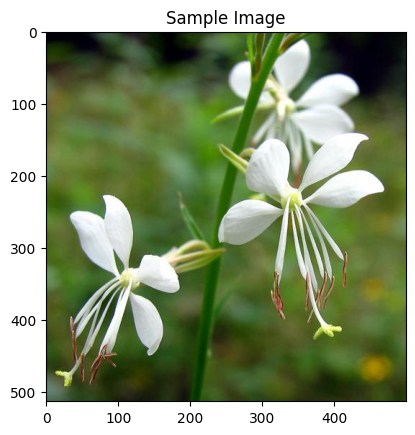

In [3]:
sample = os.path.join('jpg', 'image_08118.jpg')
sample = Image.open(sample)

plt.imshow(sample)
plt.title('Sample Image')
plt.show()

Difference in dimensions can be observed clearly. Observing the first few images for consistency.

In [4]:
image_dir = 'jpg'

# List some image files
image_files = os.listdir(image_dir)
selected_images = image_files[:5]

for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    with Image.open(image_path) as img:
        print(f"{image_file}: {img.size}")


image_00001.jpg: (591, 500)
image_00002.jpg: (625, 500)
image_00003.jpg: (500, 667)
image_00004.jpg: (667, 500)
image_00005.jpg: (508, 500)


Images are of different dimensions. Resizing for consistency to (224, 224)

# Resize Images

In [ ]:
from PIL import Image, ImageOps

def resize_images(source_dir, target_dir, size=(224, 224)):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    image_files = os.listdir(source_dir)
    for image_file in image_files:
        source_path = os.path.join(source_dir, image_file)
        target_path = os.path.join(target_dir, image_file)

        with Image.open(source_path) as img:
            resized_img = img.resize(size, Image.Resampling.LANCZOS)
            resized_img.save(target_path)

source_dir = 'jpg'
target_dir = 'jpg_resized'

# Resize all images
resize_images(source_dir, target_dir)

In [5]:
image_dir = 'jpg_resized'

image_files = os.listdir(image_dir)
selected_images = image_files[:5]

for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    with Image.open(image_path) as img:
        print(f"{image_file}: {img.size}")

image_00001.jpg: (224, 224)
image_00002.jpg: (224, 224)
image_00003.jpg: (224, 224)
image_00004.jpg: (224, 224)
image_00005.jpg: (224, 224)


Now all the images are of same dimensions as 224.

# Image segmentation

Repeating same approach for segmentation images.

In [6]:
image_dir = 'segmim'

image_files = os.listdir(image_dir)
selected_images = image_files[:5]

for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    with Image.open(image_path) as img:
        print(f"{image_file}: {img.size}")

segmim_00001.jpg: (591, 500)
segmim_00002.jpg: (625, 500)
segmim_00003.jpg: (500, 667)
segmim_00004.jpg: (667, 500)
segmim_00005.jpg: (508, 500)


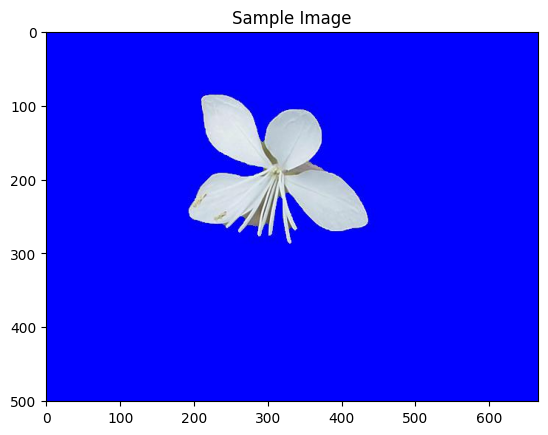

In [ ]:
sample_image = os.path.join('segmim', 'segmim_08132.jpg')
sample_image = Image.open(sample_image)
plt.imshow(sample_image)
plt.title('Sample Image')
plt.show()

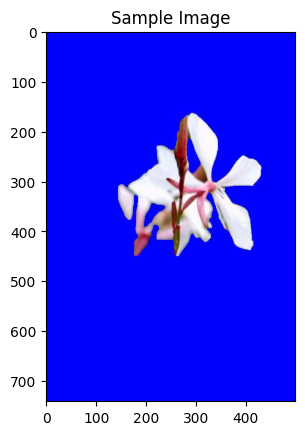

In [ ]:
sample_image = os.path.join('segmim', 'segmim_08139.jpg')
sample_image = Image.open(sample_image)
plt.imshow(sample_image)
plt.title('Sample Image')
plt.show()

In [ ]:
def resize_images(source_dir, target_dir, size=(224, 224)):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    image_files = os.listdir(source_dir)
    for image_file in image_files:
        source_path = os.path.join(source_dir, image_file)
        target_path = os.path.join(target_dir, image_file)

        with Image.open(source_path) as img:
            resized_img = img.resize(size, Image.Resampling.LANCZOS)
            resized_img.save(target_path)

# Define source and target directories
source_dir = 'segmim'
target_dir = 'segmim_resized'

# Resize all images
resize_images(source_dir, target_dir)

In [7]:
image_dir = 'segmim_resized'

# List some image files
image_files = os.listdir(image_dir)
selected_images = image_files[:5]

for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    with Image.open(image_path) as img:
        print(f"{image_file}: {img.size}")

segmim_00001.jpg: (224, 224)
segmim_00002.jpg: (224, 224)
segmim_00003.jpg: (224, 224)
segmim_00004.jpg: (224, 224)
segmim_00005.jpg: (224, 224)


In [8]:
image_labels

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [9]:
data_splits

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009',
 '__version__': '1.0',
 '__globals__': [],
 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16),
 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16),
 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

In [10]:
labels = image_labels['labels'][0]
train_ids = data_splits['trnid'][0]
validation_ids = data_splits['valid'][0]
test_ids = data_splits['tstid'][0]
train_ids = [id-1 for id in train_ids]
validation_ids = [id-1 for id in validation_ids]
test_ids = [id-1 for id in test_ids]

In [11]:
def get_image_label_pairs(image_dir, ids, labels):
    image_label_pairs = []
    for id in ids:
        filename = f"image_{str(id+1).zfill(5)}.jpg"
        label = labels[id]
        image_path = os.path.join(image_dir, filename)
        image_label_pairs.append((image_path, label))
    return image_label_pairs

train_pairs = get_image_label_pairs('jpg_resized', train_ids, labels)
validation_pairs = get_image_label_pairs('jpg_resized', validation_ids, labels)
test_pairs = get_image_label_pairs('jpg_resized', test_ids, labels)


# Import Libraries

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image

# Data pre processing

In [13]:
class FlowerDataset(Dataset):
    def __init__(self, image_label_pairs, transform=None):
        self.image_label_pairs = image_label_pairs
        self.transform = transform

    def __len__(self):
        return len(self.image_label_pairs)

    def __getitem__(self, idx):
        image_path, label = self.image_label_pairs[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label - 1, dtype=torch.long)


# Transformation

In [14]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Initialize datasets
train_dataset = FlowerDataset(train_pairs, transform=transform)
validation_dataset = FlowerDataset(validation_pairs, transform=transform)
test_dataset = FlowerDataset(test_pairs, transform=transform)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
# Pre-trained ResNet 50
model = models.resnet50(pretrained=True)

# Modify the final layer
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 102)  

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
device

device(type='cuda', index=0)

In [17]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Fine-tune only the final layer

In [18]:
def train_model(model, criterion, optimizer, train_loader, validation_loader, epochs=25):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Backward + optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f'Epoch {epoch+1}/{epochs} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation
        model.eval()  # Set model to evaluate mode
        val_running_loss = 0.0
        val_running_corrects = 0

        for inputs, labels in validation_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            val_running_corrects += torch.sum(preds == labels.data)

        val_loss = val_running_loss / len(validation_loader.dataset)
        val_acc = val_running_corrects.double() / len(validation_loader.dataset)

        print(f'Epoch {epoch+1}/{epochs} Validation Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

train_model(model, criterion, optimizer, train_loader, validation_loader, epochs=25)

Epoch 1/25 Train Loss: 4.5611 Acc: 0.0941
Epoch 1/25 Validation Loss: 3.5592 Acc: 0.2500
Epoch 2/25 Train Loss: 2.6221 Acc: 0.5490
Epoch 2/25 Validation Loss: 2.3190 Acc: 0.5922
Epoch 3/25 Train Loss: 1.5726 Acc: 0.8059
Epoch 3/25 Validation Loss: 1.7838 Acc: 0.6951
Epoch 4/25 Train Loss: 0.9912 Acc: 0.9039
Epoch 4/25 Validation Loss: 1.3793 Acc: 0.7510
Epoch 5/25 Train Loss: 0.6796 Acc: 0.9559
Epoch 5/25 Validation Loss: 1.1640 Acc: 0.8088
Epoch 6/25 Train Loss: 0.4698 Acc: 0.9735
Epoch 6/25 Validation Loss: 1.0369 Acc: 0.8275
Epoch 7/25 Train Loss: 0.3582 Acc: 0.9863
Epoch 7/25 Validation Loss: 0.9619 Acc: 0.8324
Epoch 8/25 Train Loss: 0.2796 Acc: 0.9892
Epoch 8/25 Validation Loss: 0.8961 Acc: 0.8392
Epoch 9/25 Train Loss: 0.2219 Acc: 0.9980
Epoch 9/25 Validation Loss: 0.8432 Acc: 0.8363
Epoch 10/25 Train Loss: 0.1791 Acc: 0.9971
Epoch 10/25 Validation Loss: 0.8003 Acc: 0.8461
Epoch 11/25 Train Loss: 0.1481 Acc: 1.0000
Epoch 11/25 Validation Loss: 0.7633 Acc: 0.8549
Epoch 12/25 Train

Model is learning not too slowly and gradual decrease in both training and validation loss can be observed indicating optimal learning rate with increase in accuracy.

In [19]:
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluate mode
    running_corrects = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)

    test_acc = running_corrects.double() / len(test_loader.dataset)
    print(f'Test Accuracy: {test_acc:.4f}')

evaluate_model(model, test_loader)

Test Accuracy: 0.8305


Test accuracy after 25 epoch is 83% which can be increased further by increasing the number of epochs and trying different learning rates and optimizer for fine tuning model. 

In [20]:
from sklearn.metrics import classification_report
import numpy as np

def get_predictions_and_labels(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

# Get predictions and labels
predictions, labels = get_predictions_and_labels(model, test_loader)

# Generate classification report
print(classification_report(labels, predictions, target_names=[f'Class {i}' for i in range(1, 103)]))

              precision    recall  f1-score   support

     Class 1       0.48      0.80      0.60        20
     Class 2       0.95      0.95      0.95        40
     Class 3       0.28      0.40      0.33        20
     Class 4       0.48      0.33      0.39        36
     Class 5       0.84      0.84      0.84        45
     Class 6       0.96      0.96      0.96        25
     Class 7       0.67      0.90      0.77        20
     Class 8       1.00      0.98      0.99        65
     Class 9       0.56      0.92      0.70        26
    Class 10       0.78      1.00      0.88        25
    Class 11       0.80      0.55      0.65        67
    Class 12       0.91      0.96      0.93        67
    Class 13       0.91      1.00      0.95        29
    Class 14       0.90      0.96      0.93        28
    Class 15       0.93      0.90      0.91        29
    Class 16       0.43      1.00      0.60        21
    Class 17       1.00      0.95      0.98        65
    Class 18       0.75    

In [23]:
import matplotlib.pyplot as plt

def plot_curves(training_losses, training_accuracies, validation_losses, validation_accuracies):
    epochs = range(1, len(training_losses) + 1)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_losses, label='Training Loss')
    plt.plot(epochs, validation_losses, label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_accuracies, label='Training Accuracy')
    plt.plot(epochs, validation_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

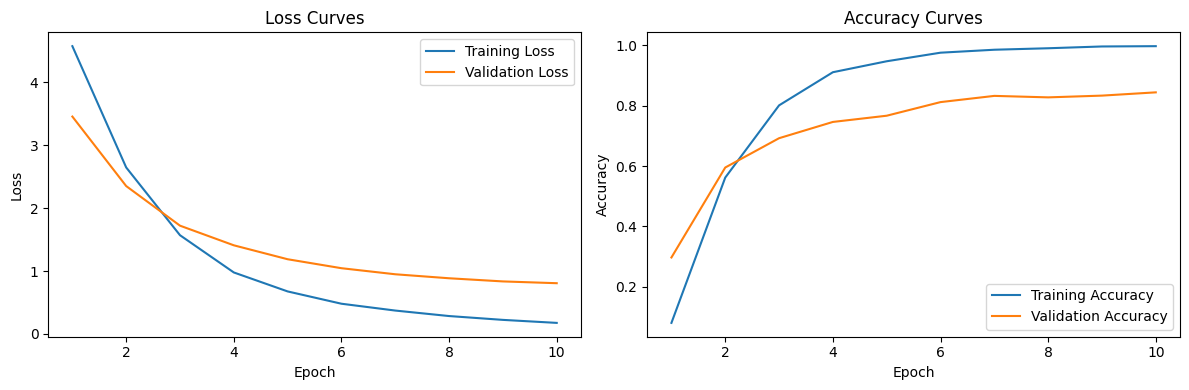

In [24]:
training_losses = [4.5768, 2.6475, 1.5696, 0.9773, 0.6755, 0.4798, 0.3712, 0.2839, 0.2229, 0.1751]
validation_losses = [3.4570, 2.3515, 1.7214, 1.4091, 1.1875, 1.0449, 0.9484, 0.8849, 0.8347, 0.8063]
training_accuracies = [0.0804, 0.5618, 0.8010, 0.9108, 0.9471, 0.9755, 0.9853, 0.9902, 0.9961, 0.9971]
validation_accuracies = [0.2971, 0.5951, 0.6922, 0.7461, 0.7667, 0.8118, 0.8324, 0.8275, 0.8333, 0.8441]

plot_curves(training_losses, training_accuracies, validation_losses, validation_accuracies)


In conclusion, gradual decrease in the loss indicate model is training well and performing well both on training and validation data with increasing accuracy with no clear sign of accuracy. For this approach current parameters seems the best performing so far for flower image classification data.